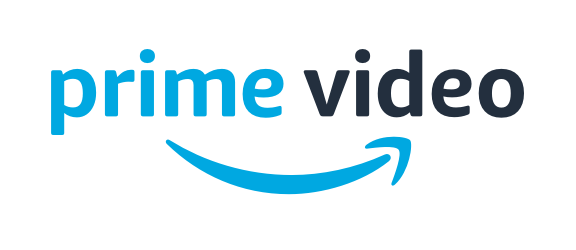

In [6]:
from IPython.display import display, Image

ruta_imagen = 'Prime_Video.png'

display(Image(filename=ruta_imagen))

1. Understanding what content is available in different countries
2. Identifying similar content by matching text-based features
3. Network analysis of Actors / Directors and find interesting insights
4. Does Netflix has more focus on TV Shows than movies in recent years.

In [7]:
import pandas as pd
import seaborn as sns
import cufflinks as cf
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display,HTML
cf.set_config_file(sharing='public',theme='white',offline=True) 
# write cf.getThemes() to find all themes available

In [8]:
cf.getThemes() 

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [9]:
df = pd.read_csv("amazon_prime.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [11]:
df.isna().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
#Is there a reason why users are not allowed to know their country where to use the account?
df["country"].sample(20)


7346              NaN
7295              NaN
3675    United States
1243              NaN
236               NaN
603               NaN
660               NaN
5830            India
3578              NaN
6996              NaN
2445              NaN
5255            India
6194              NaN
7970              NaN
6606              NaN
701               NaN
9054              NaN
5678              NaN
5411              NaN
7236              NaN
Name: country, dtype: object

Preserving the Unknown Location is an important piece of information to show in the results. For this reason, I replaced null values with Unknown

In [13]:
df["country"].value_counts()

country
United States                            253
India                                    229
United Kingdom                            28
Canada                                    16
United Kingdom, United States             12
                                        ... 
United States, Germany, Brazil, Italy      1
South Africa                               1
Australia, United States, Germany          1
Germany, Austria, United States            1
Italy, Spain                               1
Name: count, Length: 86, dtype: int64

In [14]:
frecuency_count = df["country"].value_counts().head(4)

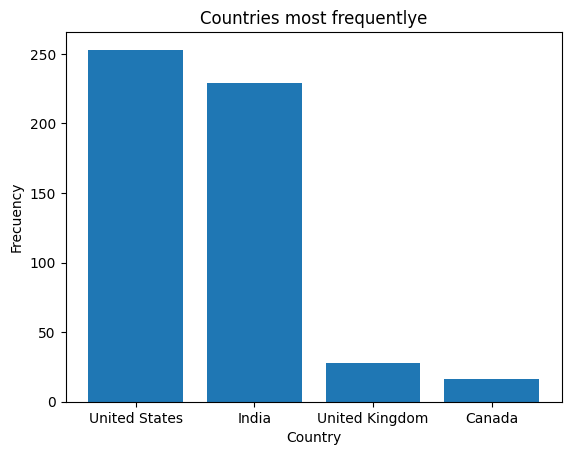

In [15]:
# Crea un gráfico de barras
plt.bar(frecuency_count.index, frecuency_count.values)

# Agrega etiquetas y título
plt.xlabel('Country')
plt.ylabel('Frecuency')
plt.title('Countries most frequentlye')

# Muestra el gráfico
plt.show()

In [16]:
country_count = df["country"].value_counts().head(4)

In [17]:
# Se define una función para manejar la división de cadenas y contar palabras
def contar_palabras(cadena):
    if isinstance(cadena, str):
        return len(cadena.split(','))
    else:
        return 0

# Se usa la función en apply
df['country_number'] = df['country'].apply(contar_palabras)

df[['country', 'country_number']].sample(10)


,country,country_number
6235,NaN,0
610,NaN,0
3505,NaN,0
7080,NaN,0
6387,NaN,0
1195,NaN,0
6482,NaN,0
96,NaN,0
3528,NaN,0
623,NaN,0


In [18]:
df_filtrado = df[df['country_number'] >= 2]
df_filtrado["country_number"]

165     2
175     2
193     2
255     2
261     3
       ..
9375    2
9421    2
9442    2
9503    2
9565    2
Name: country_number, Length: 104, dtype: int64

There are 256 records that have two or more country locations

In [19]:
df_filtrado["country_number"].sum() 

256

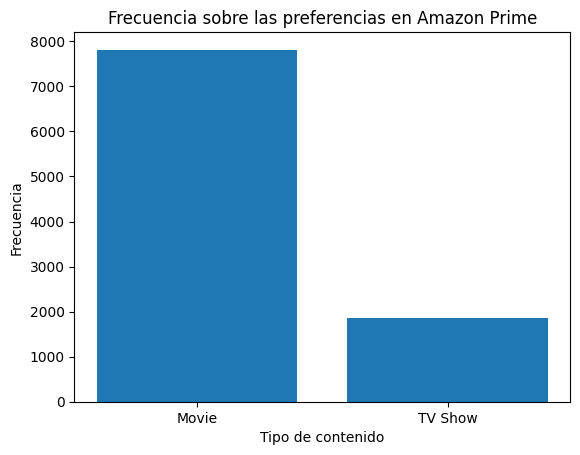

In [20]:
# Cuenta la frecuencia de cada tipo en la columna 'type'
frecuencia = df['type'].value_counts()

# Crea un gráfico de barras
plt.bar(frecuencia.index, frecuencia.values)

# Agrega etiquetas y título
plt.xlabel('Tipo de contenido')
plt.ylabel('Frecuencia')
plt.title('Frecuencia sobre las preferencias en Amazon Prime')

# Muestra el gráfico
plt.show()